# Text Clustering and Topic Modeling

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


## ArXiv's Articles: Computation and Language

In [2]:
# Load data from Hugging Face
from datasets import load_dataset
dataset = load_dataset("maartengr/arxiv_nlp")["train"]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/617 [00:00<?, ?B/s]

data.csv:   0%|          | 0.00/53.2M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [3]:
# Extract metadata
abstracts = dataset["Abstracts"]
titles = dataset["Titles"]

In [4]:
print(f"Title: {titles[0]}\n\nAbstract: {abstracts[0]}")

Title: Introduction to Arabic Speech Recognition Using CMUSphinx System

Abstract:   In this paper Arabic was investigated from the speech recognition problem
point of view. We propose a novel approach to build an Arabic Automated Speech
Recognition System (ASR). This system is based on the open source CMU Sphinx-4,
from the Carnegie Mellon University. CMU Sphinx is a large-vocabulary;
speaker-independent, continuous speech recognition system based on discrete
Hidden Markov Models (HMMs). We build a model using utilities from the
OpenSource CMU Sphinx. We will demonstrate the possible adaptability of this
system to Arabic voice recognition.



## A Common Pipeline for Text Clustering

### Embedding Documents

In [5]:
from sentence_transformers import SentenceTransformer

# Create an embedding for each abstract
embedding_model = SentenceTransformer("thenlper/gte-small")
embeddings = embedding_model.encode(abstracts, show_progress_bar = True)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1405 [00:00<?, ?it/s]

In [6]:
# Check the dimensions of the resulting embeddings
embeddings.shape

(44949, 384)

### Reducing the Dimensionality of Embeddings

In [7]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.8 MB/s eta 0:00:00


In [8]:
from umap import UMAP

# Reduce the dimensionality of the embeddings
umap_model = UMAP(
    n_components = 5,
    min_dist=0.0,
    metric = 'cosine',
    random_state=42
)
reduced_embeddings = umap_model.fit_transform(embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [9]:
reduced_embeddings.shape

(44949, 5)

### Cluster the Reduced Embeddings

In [10]:
!pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 59.2 MB/s eta 0:00:00


In [11]:
from hdbscan import HDBSCAN

In [12]:
# We fit the model and extract the clusters
hdbscan_model = HDBSCAN(
    min_cluster_size = 50,
    metric="euclidean",
    cluster_selection_method="eom"
).fit(reduced_embeddings)

clusters = hdbscan_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [13]:
# How many clusters did we generate
len(set(clusters))

153

### Inspecting the Clusters

In [14]:
import numpy as np

In [15]:
# Print first three documents in cluster 0
cluster = 0
for index in np.where(clusters == cluster)[0][:3]:
    print(abstracts[index][:300] + "... \n")

  This works aims to design a statistical machine translation from English text
to American Sign Language (ASL). The system is based on Moses tool with some
modifications and the results are synthesized through a 3D avatar for
interpretation. First, we translate the input text to gloss, a written fo... 

  Researches on signed languages still strongly dissociate lin- guistic issues
related on phonological and phonetic aspects, and gesture studies for
recognition and synthesis purposes. This paper focuses on the imbrication of
motion and meaning for the analysis, synthesis and evaluation of sign lang... 

  Modern computational linguistic software cannot produce important aspects of
sign language translation. Using some researches we deduce that the majority of
automatic sign language translation systems ignore many aspects when they
generate animation; therefore the interpretation lost the truth inf... 



### Reduce the document embeddings to two dimensions

In [16]:
import pandas as pd

In [20]:
# Reduce 384-dimensional embeddings to two dimensions for easier visualization
reduced_embeddings = UMAP(
    n_components=2,
    min_dist=0.0,
    metric="cosine",
    random_state=42
).fit_transform(embeddings)

# Create dataframe
df = pd.DataFrame(reduced_embeddings, columns=["x", "y"])
df["title"] = titles
df["cluster"] = [str(c) for c in clusters]

# Select outliers and non-outliers (clusters)
clusters_df = df.loc[df.cluster != "-1", :]
outliers_df = df.loc[df.cluster == "-1", :]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [21]:
import matplotlib.pyplot as plt

(-7.778345727920533,
 10.878833436965943,
 -1.711702972650528,
 16.388065367937088)

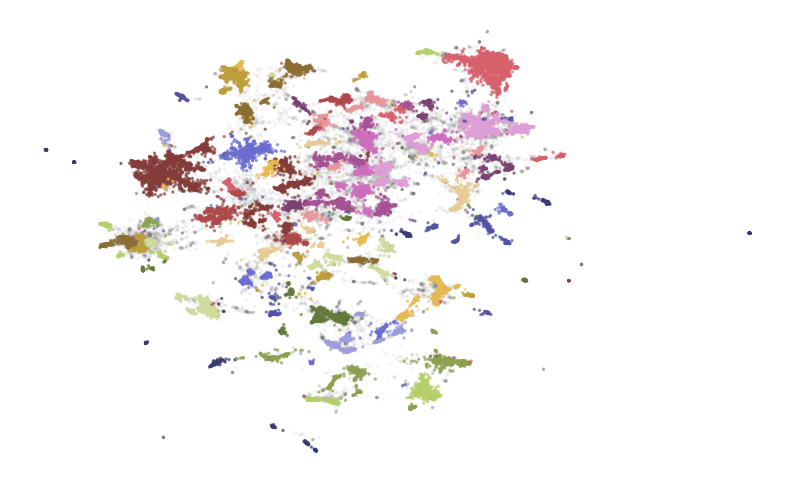

In [22]:
# Plot outliers and non-outliers separately
plt.figure(figsize=(10,6))

plt.scatter(outliers_df['x'], outliers_df['y'], alpha=0.05, s=2, c='grey')
plt.scatter(
    clusters_df['x'],
    clusters_df['y'],
    c = clusters_df['cluster'].astype(int),
    alpha=0.6,
    s=2,
    cmap="tab20b"
)

plt.axis("off")

## From Text Clustering to Topic Modeling

### BERTopic: A Modular Topic Modeling Framework

In [24]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 10.9 MB/s eta 0:00:00


In [25]:
from bertopic import BERTopic

In [27]:
# Train our model with our previously defined models
topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    verbose=True
).fit(abstracts, embeddings)

2025-01-08 14:56:23,688 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-01-08 14:57:30,705 - BERTopic - Dimensionality - Completed ✓
2025-01-08 14:57:30,711 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-01-08 14:57:36,225 - BERTopic - Cluster - Completed ✓
2025-01-08 14:57:36,241 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-01-08 14:57:40,767 - BERTopic - Representation - Completed ✓


In [28]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,14462,-1_the_of_and_to,"[the, of, and, to, in, we, for, that, language...",[ Cross-lingual text classification aims at t...
1,0,2241,0_question_questions_qa_answer,"[question, questions, qa, answer, answering, a...",[ Question generation (QG) attempts to solve ...
2,1,2098,1_speech_asr_recognition_end,"[speech, asr, recognition, end, acoustic, audi...",[ End-to-end models have achieved impressive ...
3,2,903,2_image_visual_multimodal_images,"[image, visual, multimodal, images, vision, mo...",[ In this paper we propose a model to learn m...
4,3,887,3_summarization_summaries_summary_abstractive,"[summarization, summaries, summary, abstractiv...",[ We present a novel divide-and-conquer metho...
...,...,...,...,...,...
148,147,54,147_counseling_mental_therapy_health,"[counseling, mental, therapy, health, psychoth...",[ Mental health care poses an increasingly se...
149,148,53,148_chatgpt_its_openai_has,"[chatgpt, its, openai, has, it, tasks, capabil...","[ Over the last few years, large language mod..."
150,149,52,149_mixed_code_sentiment_mixing,"[mixed, code, sentiment, mixing, english, anal...",[ In today's interconnected and multilingual ...
151,150,51,150_diffusion_generation_autoregressive_text,"[diffusion, generation, autoregressive, text, ...",[ Diffusion models have achieved great succes...


In [30]:
topic_model.get_topic(1)

[('speech', 0.029008261668635314),
 ('asr', 0.01953174996310042),
 ('recognition', 0.013885176883441992),
 ('end', 0.010564109790927942),
 ('acoustic', 0.00981251409399381),
 ('audio', 0.006891787503395377),
 ('speaker', 0.006848250444683579),
 ('error', 0.006612295041159941),
 ('wer', 0.006588686454780454),
 ('the', 0.006447719139235802)]

In [31]:
topic_model.find_topics("deep learning")

([-1, 33, 44, 26, 15],
 [0.88274133, 0.8823866, 0.88133204, 0.87809885, 0.87747085])